In [1]:
import numpy as np
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
PATH_TO_USER_FILE = "yelp_academic_dataset_user.csv"

In [3]:
user_df = pd.read_csv(PATH_TO_USER_FILE)

In [38]:
user_df.name = user_df.name.str.strip('b\'')
user_df.yelping_since = user_df.yelping_since.str.strip('b\'')
user_df.elite = user_df.elite.str.strip('b\'')
user_df.user_id = user_df.user_id.str.strip('b\'')

In [195]:
user_df.iloc[1]
todays_date = datetime.now()

def convert_age(x):
    y = x.replace("b'", "")
    y = y[:-1]
    date = datetime.strptime(y, '%Y-%m-%d')
    return (todays_date.year - date.year) * 12 + todays_date.month - date.month
    

user_df['age'] = user_df['yelping_since'].apply(lambda x: convert_age(x))

In [131]:
user_df.shape

(1518169, 23)

In [63]:
user_df.dtypes

compliment_writer       int64
review_count            int64
yelping_since          object
fans                    int64
average_stars         float64
compliment_profile      int64
name                   object
funny                   int64
compliment_funny        int64
useful                  int64
compliment_cute         int64
elite                  object
compliment_cool         int64
compliment_plain        int64
compliment_more         int64
cool                    int64
compliment_note         int64
friends                object
user_id                object
compliment_list         int64
compliment_photos       int64
compliment_hot          int64
dtype: object

In [70]:
user_df.max()

compliment_writer                                                 15433
review_count                                                      12723
yelping_since                                             b'2018-07-02'
fans                                                               8665
average_stars                                                         5
compliment_profile                                                14165
name                                                              b'zz'
funny                                                            242120
compliment_funny                                                  30699
useful                                                           258479
compliment_cute                                                   13648
elite                                                           b'None'
compliment_cool                                                   30699
compliment_plain                                                

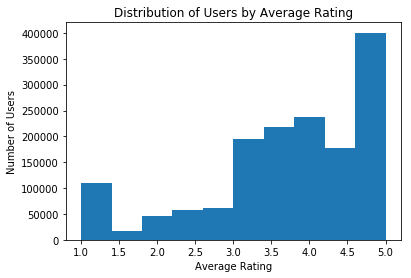

In [165]:
title = 'Distribution of Users by Average Rating'
plt.hist(user_df.average_stars, range=(1,5))
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');

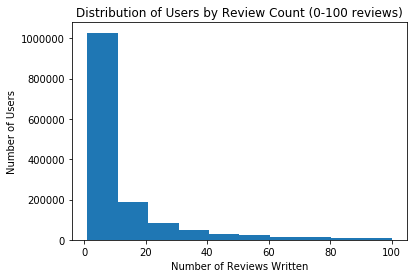

In [171]:
title = 'Distribution of Users by Review Count (0-100 reviews)'
plt.hist(user_df.review_count, range=(1,100))
plt.xlabel('Number of Reviews Written')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');

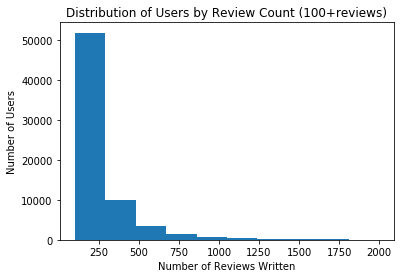

In [172]:
title = 'Distribution of Users by Review Count (100+reviews)'
plt.hist(user_df.review_count, range=(100,2000))
plt.xlabel('Number of Reviews Written')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');

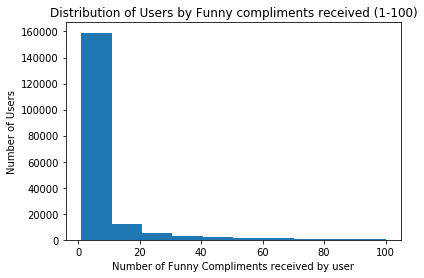

In [182]:
title = 'Distribution of Users by Funny compliments received (1-100)'
plt.hist(user_df.compliment_funny, range=(1,100))
plt.xlabel('Number of Funny Compliments received by user')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');

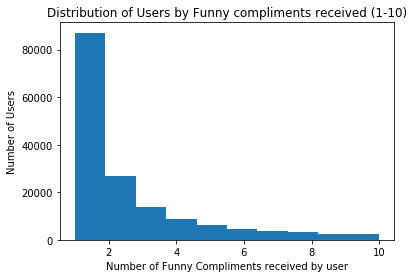

In [184]:
title = 'Distribution of Users by Funny compliments received (1-10)'
plt.hist(user_df.compliment_funny, range=(1,10))
plt.xlabel('Number of Funny Compliments received by user')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');

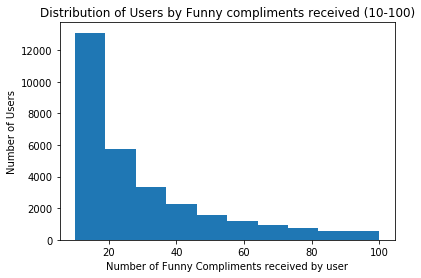

In [185]:
title = 'Distribution of Users by Funny compliments received (10-100)'
plt.hist(user_df.compliment_funny, range=(10,100))
plt.xlabel('Number of Funny Compliments received by user')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');

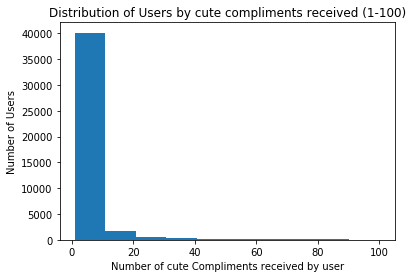

In [187]:
title = 'Distribution of Users by cute compliments received (1-100)'
plt.hist(user_df.compliment_cute, range=(1,100))
plt.xlabel('Number of cute Compliments received by user')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');

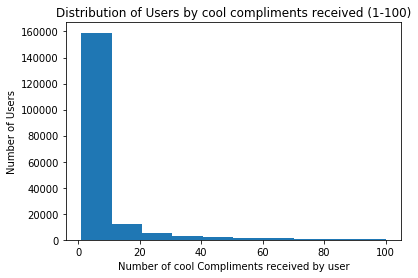

In [188]:
title = 'Distribution of Users by cool compliments received (1-100)'
plt.hist(user_df.compliment_cool, range=(1,100))
plt.xlabel('Number of cool Compliments received by user')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');

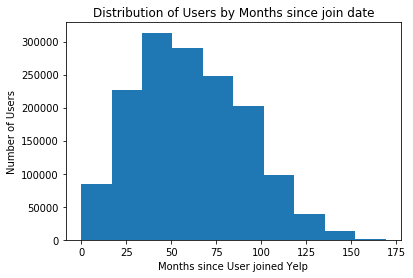

In [191]:
title = 'Distribution of Users by Months since join date'
plt.hist(user_df.age, range=(0,user_df.age.max()))
plt.xlabel('Months since User joined Yelp')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');

In [216]:
user_df.average_stars.mean()

3.716940597520549

In [224]:
user_df[user_df.compliment_cool>999].count()

compliment_writer     763
review_count          763
yelping_since         763
fans                  763
average_stars         763
compliment_profile    763
name                  763
funny                 763
compliment_funny      763
useful                763
compliment_cute       763
elite                 763
compliment_cool       763
compliment_plain      763
compliment_more       763
cool                  763
compliment_note       763
friends               763
user_id               763
compliment_list       763
compliment_photos     763
compliment_hot        763
age                   763
dtype: int64

In [6]:
def num_friends(x):
    x = str(x)
    y = x.replace("b'", "")
    y = y[:-1]
    l = y.split(',')
    return len(l)
    

user_df['numelite'] = user_df['elite'].apply(lambda x: num_friends(x))

In [16]:
user_df[user_df.numfriends >35].count()

compliment_writer     380373
review_count          380373
yelping_since         380373
fans                  380373
average_stars         380373
compliment_profile    380373
name                  380373
funny                 380373
compliment_funny      380373
useful                380373
compliment_cute       380373
elite                 380373
compliment_cool       380373
compliment_plain      380373
compliment_more       380373
cool                  380373
compliment_note       380373
friends               380373
user_id               380373
compliment_list       380373
compliment_photos     380373
compliment_hot        380373
numfriends            380373
dtype: int64

In [10]:
user_df.numfriends.max()

14995

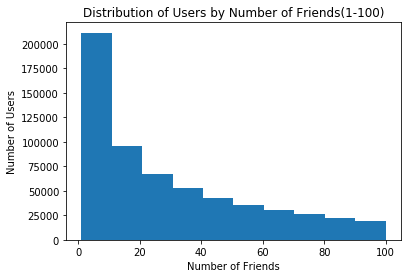

In [16]:
title = 'Distribution of Users by Number of Friends(1-100)'
plt.hist(user_df.numfriends,range=(1,100))
plt.xlabel('Number of Friends')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');

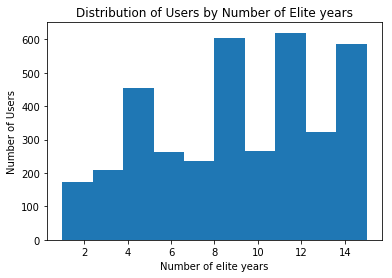

In [24]:
title = 'Distribution of Users by Number of Elite years'
plt.hist(user_df.numfriends,range=(1,15))
plt.xlabel('Number of elite years')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');